# Libraries

In [ ]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the Files

Download the csv files into the `data/` directory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/cs506_Midterm/Data/train.csv'
test_path = '/content/drive/MyDrive/cs506_Midterm/Data/test.csv'

Mounted at /content/drive


train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)
Score distribution after downsampling:
Score
5.0    396581
4.0    335228
3.0    176082
1.0     91190
2.0     89678
Name: count, dtype: int64


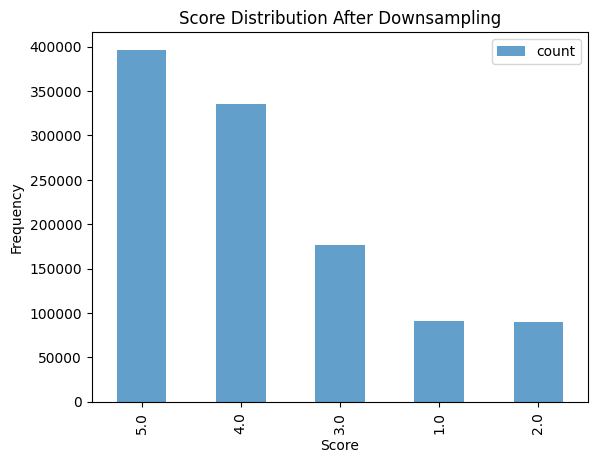

In [ ]:
trainingSet = pd.read_csv(train_path)
testingSet = pd.read_csv(test_path)

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

majority_class = trainingSet[trainingSet['Score'] == 5]
minority_class = trainingSet[trainingSet['Score'] != 5]

majority_downsampled, _ = train_test_split(
    majority_class,
    test_size=0.5,
    random_state=42
)

trainingSet = pd.concat([majority_downsampled, minority_class])

print("Score distribution after downsampling:")
print(trainingSet['Score'].value_counts())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.7)
plt.title('Score Distribution After Downsampling')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()



              Id   ProductId          UserId  HelpfulnessNumerator  \
214519    727812  B00007ELG5  A2HY0DS3E1VD1H                     0   
234041    681495  B00005T31Q  A2VJ80PM1G00QV                     0   
1199652   428080  6304546335  A1PHGQCIANBPLS                     0   
199437    994544  B000FS2W26  A1YM54DY06M24M                     6   
322849   1011176  B000H7JCHI   AEZJ5Y9VAMCXT                     3   

         HelpfulnessDenominator        Time  \
214519                        1  1136073600   
234041                        0  1263340800   
1199652                       0  1209686400   
199437                       10  1157932800   
322849                        3  1174867200   

                                                   Summary  \
214519                                     diva match only   
234041                                    Update from 2010   
1199652                                      A great movie   
199437   The Big Giant Head!?  The Big Giant He

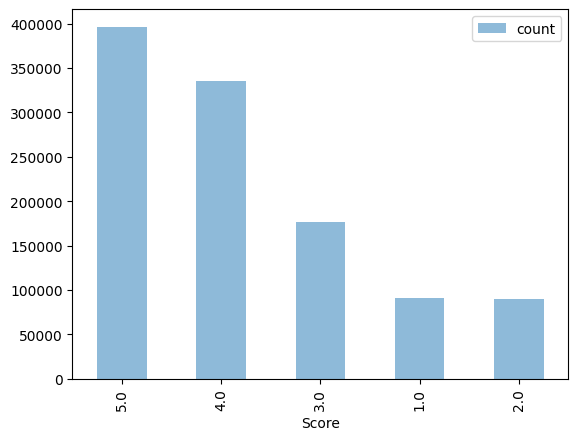


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [ ]:
print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import numpy as np
import nltk

# Adding Features

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

save_path = '/content/drive/MyDrive/cs506_Midterm/Data/X_train.csv'
load_path = '/content/drive/MyDrive/cs506_Midterm/Data/X_submission.csv'

def add_features_to(df):
    # This is where you can do all your feature extraction
    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['Text'] = df['Text'].fillna('')
    df['Summary'] = df['Summary'].fillna('')

    #stemmed_text = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)
        #for word in word_tokenize(message.lower()))
        #for message in df['Text']]

    #stemmed_summary = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)
        #for word in word_tokenize(message.lower()))
        #for message in df['Summary']]

    #df['Text'] = stemmed_text
    #df['Summary'] = stemmed_summary

    #TO-DO: More feature extraction
    vectorized_text = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.8, max_features=1000)
    vectorized_summary = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.8, max_features=500)
    dtm_text = vectorized_text.fit_transform(df['Text'])
    dtm_summary = vectorized_summary.fit_transform(df['Summary'])
    print(dtm_text)
    print(dtm_summary)
    return df

# Load the feature extracted files if they've already been generated
if exists(save_path):
    X_train = pd.read_csv(save_path)
if exists(load_path):
    X_submission = pd.read_csv(load_path)


else:
    # Process the DataFrame
    train = add_features_to(trainingSet)

    # Merge on Id so that the submission set can have feature columns as well
    X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})

    # The training set is where the score is not null
    X_train =  train[train['Score'].notnull()]

    X_submission.to_csv(load_path, index=False)
    X_train.to_csv(save_path, index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  (0, 941)	0.4979677836889688
  (0, 960)	0.5906084288874108
  (0, 513)	0.13453201915588384
  (0, 793)	0.20723675048096468
  (0, 265)	0.4702344118966085
  (0, 547)	0.2446974945713324
  (0, 699)	0.11428791526015923
  (0, 522)	0.21932815973153535
  (1, 513)	0.1527469882099572
  (1, 23)	0.23545691864184753
  (1, 221)	0.151900723160275
  (1, 84)	0.14571370252089996
  (1, 777)	0.21208210723972223
  (1, 953)	0.16230342805594983
  (1, 993)	0.19775478447778447
  (1, 80)	0.2425823437191515
  (1, 585)	0.25525701156840835
  (1, 176)	0.29669240343693287
  (1, 19)	0.1785343739075987
  (1, 349)	0.25002623804715
  (1, 878)	0.1242661103230561
  (1, 511)	0.2390375877054806
  (1, 41)	0.21339580338200512
  (1, 631)	0.15196624291509206
  (1, 117)	0.19865079267131544
  :	:
  (1300949, 930)	0.16196340683316773
  (1300949, 195)	0.05373635792681554
  (1300949, 468)	0.05741007062950552
  (1300949, 702)	0.10860393740222904
  (1300949, 633)	0.05352863151821382
  (1300949, 110)	0.20127369493994332
  (1300949, 325)

# Sample + Split into training and testing set

In [ ]:
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)

# Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix, hstack

# Define your initial numerical features
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Helpfulness']

# Fill NaN values in the 'Text' column with empty strings
X_train['Text'] = X_train['Text'].fillna('')
X_test['Text'] = X_test['Text'].fillna('')
X_submission['Text'] = X_submission['Text'].fillna('')

# Initialize the TF-IDF Vectorizer with sparse output and limit the number of features
vectorizer_text = TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8, max_features=10000)  # Limit features to 10,000

# Fit the vectorizer on training data and transform it into a sparse matrix
dtm_text_train = vectorizer_text.fit_transform(X_train['Text'])  # Keep in sparse format


In [ ]:
import os
import pickle
# Combine numerical features with TF-IDF features for training data using sparse format
X_train_select = X_train[features]
numerical_sparse_train = csr_matrix(X_train_select.values)  # Keep numerical data as sparse
X_combined_train = hstack([numerical_sparse_train, dtm_text_train], format='csr')

# Standardize the combined features for Lasso
scaler = StandardScaler(with_mean=False)  # Keep sparse format
X_train_scaled = scaler.fit_transform(X_combined_train)
y_train = Y_train  # Target variable

pickle_path = '/content/drive/MyDrive/cs506_Midterm/Data/lasso_results.pkl'

try:
    with open(pickle_path, 'rb') as f:
        lasso, lasso_coefficients, important_features = pickle.load(f)
except (pickle.PickleError, EOFError, FileNotFoundError) as e:  # Import and handle PickleError
    print(f"Error loading pickled file: {e}. Retraining Lasso model...")
    # Fit Lasso for feature selection with sparse matrix handling if loading fails
    lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)  # Adjust alpha for regularization strength
    lasso.fit(X_train_scaled, y_train)
    lasso_coefficients = pd.Series(lasso.coef_, index=vectorizer_text.get_feature_names_out().tolist() + features)
    important_features = lasso_coefficients[lasso_coefficients != 0].index.tolist()

    with open('lasso_results.pkl', 'wb') as f:
        pickle.dump((lasso, lasso_coefficients, important_features), f)

Error loading pickled file: invalid load key, '\xef'.. Retraining Lasso model...


In [ ]:
lasso_coefficients = pd.Series(lasso.coef_, index=vectorizer_text.get_feature_names_out().tolist() + features)
important_features = lasso_coefficients[lasso_coefficients != 0].index.tolist()
print("Features selected by Lasso:")
print(important_features)

# Use the Lasso-selected features for PCA
# Keep only the selected features for PCA
X_train_lasso_selected = X_train_scaled[:, lasso_coefficients != 0]

# Initialize PCA with desired number of components (e.g., 50)
pca = PCA(n_components=50)

X_train_pca = pca.fit_transform(X_train_lasso_selected)


# ---- Apply to Test Set ----
# Transform the test set using the same vectorizer and sparse format
dtm_text_test = vectorizer_text.transform(X_test['Text'])  # Use transform, not fit_transform
numerical_sparse_test = csr_matrix(X_test[features].values)
X_combined_test = hstack([numerical_sparse_test, dtm_text_test], format='csr')

# Apply the same standardization to the test set
X_test_scaled = scaler.transform(X_combined_test)
X_test_lasso_selected = X_test_scaled[:, lasso_coefficients != 0]  # Use only selected features
X_test_pca = pca.transform(X_test_lasso_selected)  # Apply PCA transformation


Features selected by Lasso:
['00', '000', '007', '01', 'abandon', 'abound', 'abused', 'accent', 'accepts', 'actions', 'active', 'activities', 'activity', 'actual', 'administration', 'adrian', 'advertising', 'aerobics', 'ago', 'aka', 'albert', 'alpha', 'alternative', 'amazingly', 'amazon', 'ambassador', 'amber', 'anne', 'answered', 'appealing', 'appear', 'applied', 'approached', 'arrogant', 'ashes', 'asia', 'ass', 'asylum', 'ate', 'attacked', 'attenborough', 'attend', 'attending', 'audition', 'audrey', 'avoided', 'await', 'awards', 'awkward', 'awry', 'babies', 'bait', 'baked', 'bandits', 'barnes', 'bars', 'basis', 'beck', 'beckinsale', 'becky', 'betrayed', 'bewitched', 'bible', 'biological', 'blamed', 'blank', 'blatant', 'bleeding', 'boasts', 'bombs', 'book', 'borderline', 'boring', 'boris', 'born', 'borrowed', 'bought', 'bouncing', 'break', 'breathtaking', 'brennan', 'brings', 'brink', 'britain', 'bruno', 'buffs', 'buried', 'button', 'buzz', 'byrne', 'cameras', 'camp', 'captive', 'capt

In [ ]:
x

# Model Creation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler # Make sure to import StandardScaler

# Define a cross-validation function
def cross_validate_kfold(k, X, y, estimator):
    np.random.seed(1)
    best_score = float('inf')
    optimal_model = None

    kf = KFold(n_splits=k, shuffle=True, random_state=1)

    for fold, (train_indices, test_indices) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)

        fold_score = mean_squared_error(y_test, y_pred)
        print(f"Fold {fold} MSE: {fold_score:.4f}")

        if fold_score < best_score:
            best_score = fold_score
            optimal_model = estimator

    print(f"Best Mean Squared Error across folds: {best_score:.4f}")
    return optimal_model, best_score

# ---- Model Training and Evaluation (Logistic Regression only) ----

logistic_model = LogisticRegression(random_state=0)
best_logistic_model, best_logistic_score = cross_validate_kfold(5, X_train_pca, Y_train, logistic_model)
print("Logistic Regression best MSE:", best_logistic_score)

# ---- Final Model Evaluation on Test Set ----

best_logistic_model.fit(X_train_pca, Y_train) # Using the best logistic model
Y_test_predictions = best_logistic_model.predict(X_test_pca)

test_accuracy = accuracy_score(Y_test, Y_test_predictions) # Assuming Y_test is defined
print("Test set accuracy:", test_accuracy)

Fold 1 MSE: 1.0967
Fold 2 MSE: 1.0839
Fold 3 MSE: 1.0886
Fold 4 MSE: 1.0863
Fold 5 MSE: 1.0867
Best Mean Squared Error across folds: 1.0839
Logistic Regression best MSE: 1.0838874805589234
Test set accuracy: 0.5251552224549029


# Model Evaluation

Accuracy on testing set =  0.5251552224549029


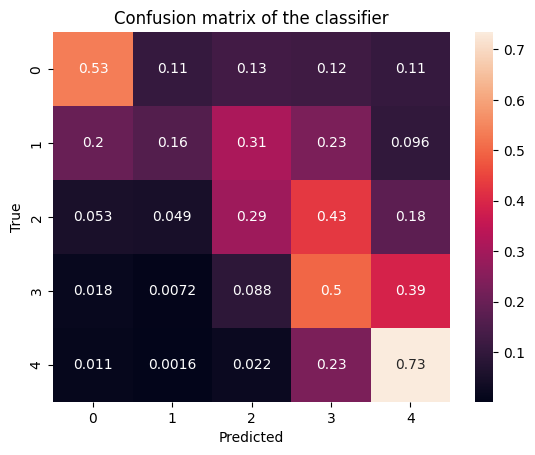

In [ ]:
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Fit the encoder on ProductId from X_train
encoder = LabelEncoder()
encoder.fit(X_train['ProductId'].astype(str))

# Preprocess submission data with fallback for unseen labels
def preprocess_submission_data(X_submission, encoder):
    # Convert 'ProductId' to string to avoid issues with integer labels
    X_submission['ProductId'] = X_submission['ProductId'].astype(str)

    # Check for unseen labels and replace them with a placeholder
    X_submission['ProductId_encoded'] = X_submission['ProductId'].apply(
        lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1
    )

    return X_submission.drop(columns=['ProductId'])

# Process and predict on submission data
X_submission_final = preprocess_submission_data(X_submission.copy(), encoder)
X_submission['Score'] = best_logistic_model.predict(X_submission_final)


KeyboardInterrupt: 